In [13]:
from pyomo.environ import *
from pyomo import *
import pandas as pd
import math
import numpy as np
from numpy import inf
import heapq
import logging
from pyomo.environ import *

# Set the logging level to ERROR to suppress infeasibility warnings
logging.getLogger('pyomo.core').setLevel(logging.ERROR)
model = ConcreteModel()
model.M = 1000
# Set declarations
model.s = Set(initialize=range(1, 7))  
model.num_corner = Set(initialize=range(1, 5))
model.r = Param(model.s,initialize={1:1,2:1.5,3:3,4:5,5:6,6:4.5})
model.A = Var(domain = NonNegativeReals, bounds = (10,25))
model.B = Var(domain = NonNegativeReals, bounds = (10,25))

model.x = Var(model.s)
model.y = Var(model.s)

model.corner_points = Var(model.s,range(1,3),range(1,5))
model.x_min = Var(model.s)
model.y_min = Var(model.s)
model.x_max = Var(model.s)
model.y_max = Var(model.s)
model.x_in1 = Var(Set(initialize=[(i, j,k) for i in model.r for j in model.r if i != j for k in range(1,5)]),domain = Binary)
model.x_in2 = Var(Set(initialize=[(i, j,k) for i in model.r for j in model.r if i != j for k in range(1,5)]),domain = Binary)
model.y_in1 = Var(Set(initialize=[(i, j,k) for i in model.r for j in model.r if i != j for k in range(1,5)]),domain = Binary)
model.y_in2 = Var(Set(initialize=[(i, j,k) for i in model.r for j in model.r if i != j for k in range(1,5)]),domain = Binary)


model.con1 =  Constraint(model.s, rule=lambda model, i: 
        model.x[i] + model.r[i]-0.5*model.A<=0)
model.con2 =  Constraint(model.s, rule=lambda model, i: 
        -model.x[i] + model.r[i]-0.5*model.A<=0)
model.con3 =  Constraint(model.s, rule=lambda model, i: 
        model.y[i] + model.r[i]-0.5*model.B<=0)
model.con4 =  Constraint(model.s, rule=lambda model, i: 
        -model.y[i] + model.r[i]-0.5*model.B<=0)

model.con6 =  Constraint(model.s, rule=lambda model, i: 
        model.x_max[i] == model.x[i]+model.r[i] )
model.con7 =  Constraint(model.s, rule=lambda model, i: 
        model.x_min[i] == model.x[i]-model.r[i] )
model.con8 =  Constraint(model.s, rule=lambda model, i: 
        model.y_max[i] == model.y[i]+model.r[i] )
model.con9 =  Constraint(model.s, rule=lambda model, i: 
        model.y_min[i] == model.y[i]-model.r[i] )
model.con10_1 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]>=model.x_min[j]-model.M*(1-model.x_in1[i,j,1]))
model.con11_1 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]<=model.x_max[j]+model.M*(1-model.x_in2[i,j,1]))        
model.con12_1 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]>=model.y_min[j]-model.M*(1-model.y_in1[i,j,1]))
model.con13_1 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]<=model.y_max[j]+model.M*(1-model.y_in2[i,j,1])) 

model.con10_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]<=model.x_min[j]+model.M*(model.x_in1[i,j,1]))
model.con11_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]>=model.x_max[j]-model.M*(model.x_in2[i,j,1]))        
model.con12_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]<=model.y_min[j]+model.M*(model.y_in1[i,j,1]))
model.con13_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]>=model.y_max[j]-model.M*(model.y_in2[i,j,1])) 

model.con14_1 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_in1[i,j,1]+model.x_in2[i,j,1]+model.y_in1[i,j,1]+model.y_in2[i,j,1]<=3) 

model.con10_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]>=model.x_min[j]-model.M*(1-model.x_in1[i,j,2]))
model.con11_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]<=model.x_max[j]+model.M*(1-model.x_in2[i,j,2]))        
model.con12_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]>=model.y_min[j]-model.M*(1-model.y_in1[i,j,2]))
model.con13_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]<=model.y_max[j]+model.M*(1-model.y_in2[i,j,2])) 

model.con10_2_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]<=model.x_min[j]+model.M*(model.x_in1[i,j,2]))
model.con11_2_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]>=model.x_max[j]-model.M*(model.x_in2[i,j,2]))        
model.con12_2_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]<=model.y_min[j]+model.M*(model.y_in1[i,j,2]))
model.con13_2_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]>=model.y_max[j]-model.M*(model.y_in2[i,j,2])) 

model.con14_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_in1[i,j,2]+model.x_in2[i,j,2]+model.y_in1[i,j,2]+model.y_in2[i,j,2]<=3) 

model.con10_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]<=model.x_min[j]+model.M*(model.x_in1[i,j,1]))
model.con11_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_min[i]>=model.x_max[j]-model.M*(model.x_in2[i,j,1]))        
model.con12_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]<=model.y_min[j]+model.M*(model.y_in1[i,j,1]))
model.con13_1_2 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]>=model.y_max[j]-model.M*(model.y_in2[i,j,1])) 

model.con10_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]>=model.x_min[j]-model.M*(1-model.x_in1[i,j,3]))
model.con11_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]<=model.x_max[j]+model.M*(1-model.x_in2[i,j,3]))        
model.con12_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]>=model.y_min[j]-model.M*(1-model.y_in1[i,j,3]))
model.con13_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]<=model.y_max[j]+model.M*(1-model.y_in2[i,j,3])) 

model.con10_1_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]<=model.x_min[j]+model.M*(model.x_in1[i,j,3]))
model.con11_1_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]>=model.x_max[j]-model.M*(model.x_in2[i,j,3]))        
model.con12_1_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]<=model.y_min[j]+model.M*(model.y_in1[i,j,3]))
model.con13_1_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_max[i]>=model.y_max[j]-model.M*(model.y_in2[i,j,3])) 

model.con14_3 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_in1[i,j,3]+model.x_in2[i,j,3]+model.y_in1[i,j,3]+model.y_in2[i,j,3]<=3) 
model.con10_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]>=model.x_min[j]-model.M*(1-model.x_in1[i,j,4]))
model.con11_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]<=model.x_max[j]+model.M*(1-model.x_in2[i,j,4]))        
model.con12_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]>=model.y_min[j]-model.M*(1-model.y_in1[i,j,4]))
model.con13_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]<=model.y_max[j]+model.M*(1-model.y_in2[i,j,4])) 

model.con10_1_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]<=model.x_min[j]+model.M*(model.x_in1[i,j,4]))
model.con11_1_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_max[i]>=model.x_max[j]-model.M*(model.x_in2[i,j,4]))        
model.con12_1_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]<=model.y_min[j]+model.M*(model.y_in1[i,j,4]))
model.con13_1_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.y_min[i]>=model.y_max[j]-model.M*(model.y_in2[i,j,4])) 

model.con14_4 =  Constraint(Set(initialize=[(i, j) for i in model.r for j in model.r if i!=j]), rule=lambda model, i,j: 
        model.x_in1[i,j,4]+model.x_in2[i,j,4]+model.y_in1[i,j,4]+model.y_in2[i,j,4]<=3) 
model.cost = Objective(sense=minimize, expr = model.A*model.B)
solver = SolverFactory('gurobi')
solver.options['TimeLimit'] = 60
results = solver.solve(model,tee = True)
A = model.A()
B = model.B()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-04
Read LP format model from file C:\Users\aramanuj\AppData\Local\Temp\tmpw7pl4ru7.pyomo.lp
Reading time = 0.00 seconds
x1: 1128 rows, 518 columns, 3456 nonzeros
Set parameter TimeLimit to value 60
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1128 rows, 518 columns and 3456 nonzeros
Model fingerprint: 0xb6a7a91b
Model has 1 quadratic objective term
Variable types: 38 continuous, 480 integer (480 binary)
Coefficient statistics:
  Matrix range     [5e-01, 1e+03]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 1e+03]
Presolve removed 24 rows and 24 columns
Presolve time: 0.01s
Presolved: 1106

In [17]:
def func_draw_rect(x,y,l1,l2,plt):
    plt.plot(x-l1/2, y-l2/2, marker = 'o', color = 'purple')
    plt.plot(x+l1/2, y-l2/2, marker = 'o', color = 'purple')
    plt.plot(x+l1/2, y+l2/2, marker = 'o', color = 'purple')
    plt.plot(x-l1/2, y+l2/2, marker = 'o', color = 'purple')
    plt.plot(
    [x-l1/2, x+l1/2, x+l1/2, x-l1/2, x-l1/2],
    [y-l2/2, y-l2/2, y+l2/2, y+l2/2, y-l2/2],
    color = 'purple')
    #plt.text(x, y, l1, fontsize=12)

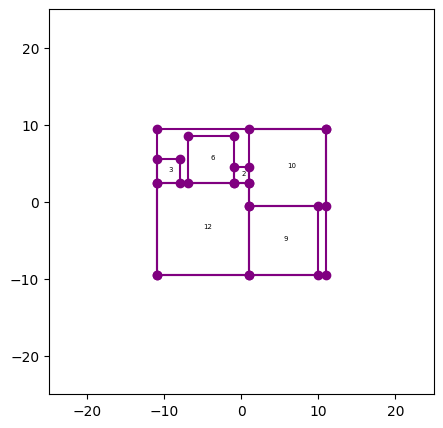

In [19]:
import matplotlib.pyplot as plt
from numpy import sin, cos, pi, linspace

plt.figure(figsize = (5, 5))
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.gca().set_aspect('equal')
func_draw_rect(0,0,A,B,plt)
for i in model.s:
    x = model.x[i]()
    y = model.y[i]()
    l1 = model.r[i]*2
    l2 = model.r[i]*2
    func_draw_rect(x,y,l1,l2,plt)
    plt.text(x, y, int(l1), fontsize=5)
plt.savefig('Packing.pdf')    
plt.show()

In [20]:
model.pprint()


2 Set Declarations
    num_corner : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {1, 2, 3, 4}
    s : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}

1 Param Declarations
    r : Size=6, Index=s, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :     1
          2 :   1.5
          3 :     3
          4 :     5
          5 :     6
          6 :   4.5

13 Var Declarations
    A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :    10 :  22.0 :    25 : False : False : NonNegativeReals
    B : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :    10 : 18.999999998095454 :    25 : False : False : NonNegativeReals
    corner_points : Size=48, Index=s*{1, 2}*{1, 2, 3, 4}
        Key       : Low

In [21]:
print(model.A())
print(model.B())

22.0
18.999999998095454
